In [2]:
import sys
import networkx as nx
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
industrial_process = pd.read_csv("C:/Users/renea/Desktop/Grafos/process_steps_2.csv") # data frame de vuelos con origen, destinos, precios y duracion
industrial_process.head()

DG = nx.DiGraph() # Vamos a generar un grafo con todas las posibles combinaciones
for row in industrial_process.iterrows(): # Para cada uno de los  rows del data frame, añadimos una edge al grafo que va a tener ...
    DG.add_edge(row[1]["origin"], # ... el origen
                row[1]["destination"],# ...el destino
                duration=row[1]["duration"], # ....la duracion
                power=row[1]["power"]) # ...y el precio


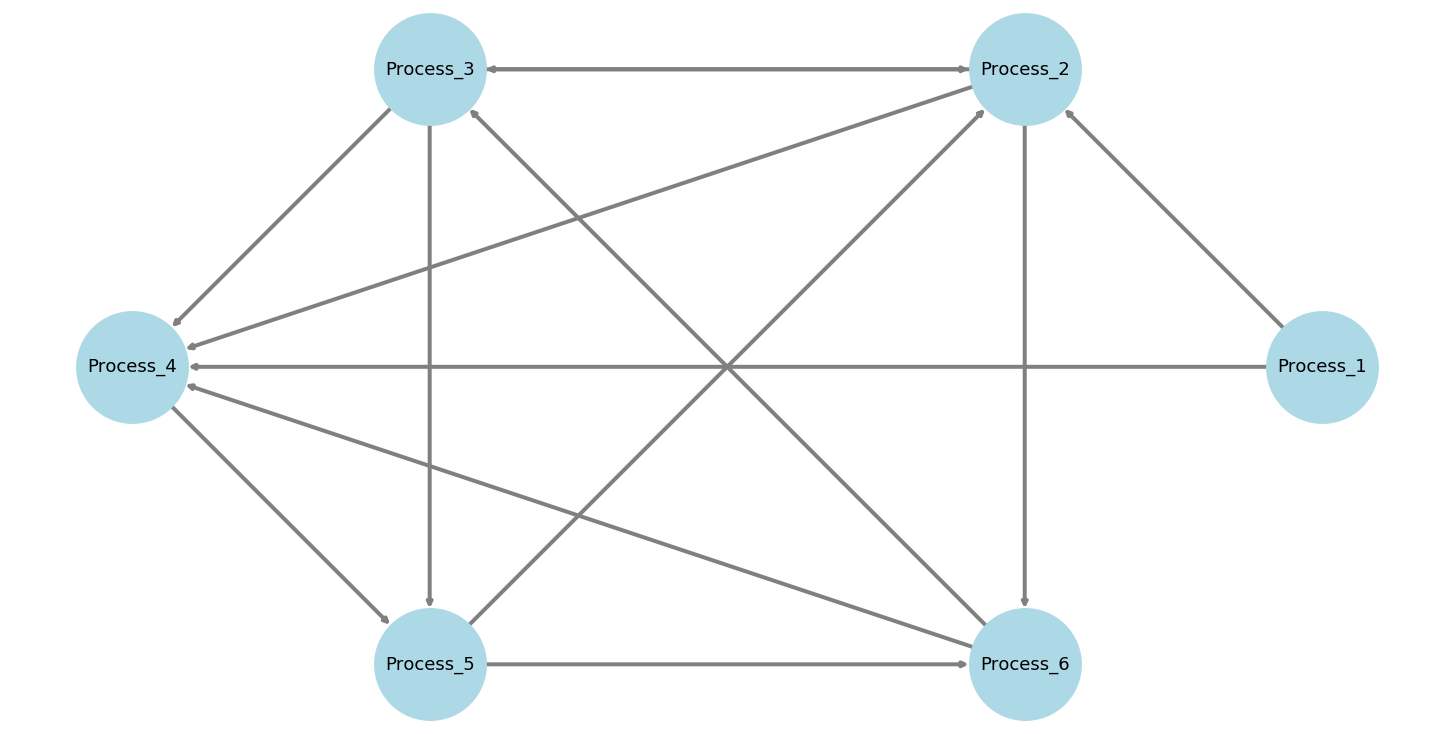

In [4]:
nx.draw_circular(DG,                                            # genera un grafo circular
                 node_color="lightblue",                        # nodos azules
                 edge_color="gray",                             # las lineas en gris 
                 font_size=18,                                  # tamaño de la fuente
                 width=4, with_labels=True, node_size=12500,     # controla el tamaño del circulo que dibuja el nodo
)

In [5]:
alg_1 = list(nx.astar_path(DG, ("Process_1"), ("Process_5"), weight = "order"))
alg_2 = list(nx.astar_path(DG, ("Process_1"), ("Process_5"), weight = "duration"))
alg_3 = list(nx.astar_path(DG, ("Process_1"), ("Process_5"), weight = None))
alg_4 = ['Process_1', 'Process_2', 'Process_3','Process_4','Process_5']

# vamos a plotear las rutas

def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos = positions,
                node_color='lightblue',
                edge_color = 'gray',
                font_size = 18,
                widht=1, with_labels = True, node_size = 10000, alpha = 0.8
           )
    
    short_path=nx.DiGraph() # esto me da todos los caminos
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
        
    nx.draw(short_path, pos=positions,
                  node_color = 'dodgerblue',
                  edge_color = 'dodgerblue',
                  font_size = 18,
                  width=3, with_labels=True, node_size = 10000
           )
    plt.show()
    
    # Una function que nos muestre el caminp
def show_path(path):
    total_price = 0
    total_duration = 0
    
    for i in range(len(path)-1):
        origin = path[i]
        destination = path[i+1]
        duration = DG[origin][destination]["duration"]
        price = DG[origin][destination]["power"]
        
        total_price = total_price+price
        total_duration = total_duration+duration
        print("    %s -> %s\n    - Duration: %s Power: %s €" %  (
            industrial_process.loc[origin]["name"],
            industrial_process.loc[destination]["name"],
            duration, price)
        ) # origen destino duracion y price
        
    print("\n     Total Duration: %s Total price: %s €\n" %  (
            total_duration, total_power)
    )
    
    # En el resultado de arriba hemos obtenido todos los resultados, sin embargo si queremos solo el mas corto en precio o en saltos....

def get_shortest_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s " % (origin, destination))
    
    for weight in [None, "duration", "power"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                 (origin),
                                 (destination),
                                 weight = weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        
# Una funcion que muestre todos los caminos mas cortos de un grafico dirigido desde un origen hasta un destino

def get_all_shortest_paths(DiGraph, origin, destination):
    print("Zeit | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 |")
    print("-------------------------------------------------------------------------")    
    print("A1   | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |  0 |  0 |  0 |  0 |  0 |  0 |")
    print("-------------------------------------------------------------------------")    
    print("A2   | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 |  0 |  0 |  0 |  0 |  0 |  0 |")
    print("-------------------------------------------------------------------------")  

['Process_1', 'Process_4', 'Process_5']


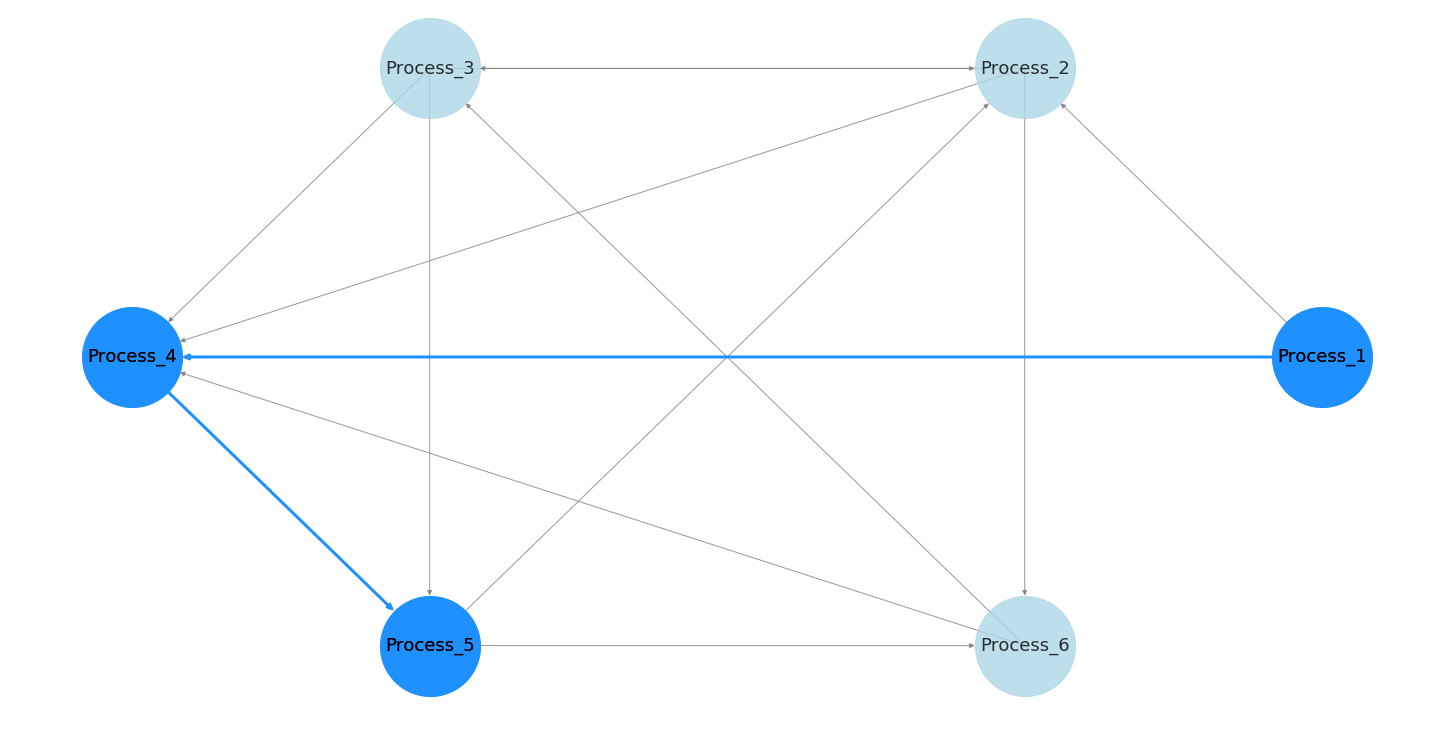

In [20]:
plot_shortest_path(alg_1)

['Process_1', 'Process_2', 'Process_3', 'Process_5']


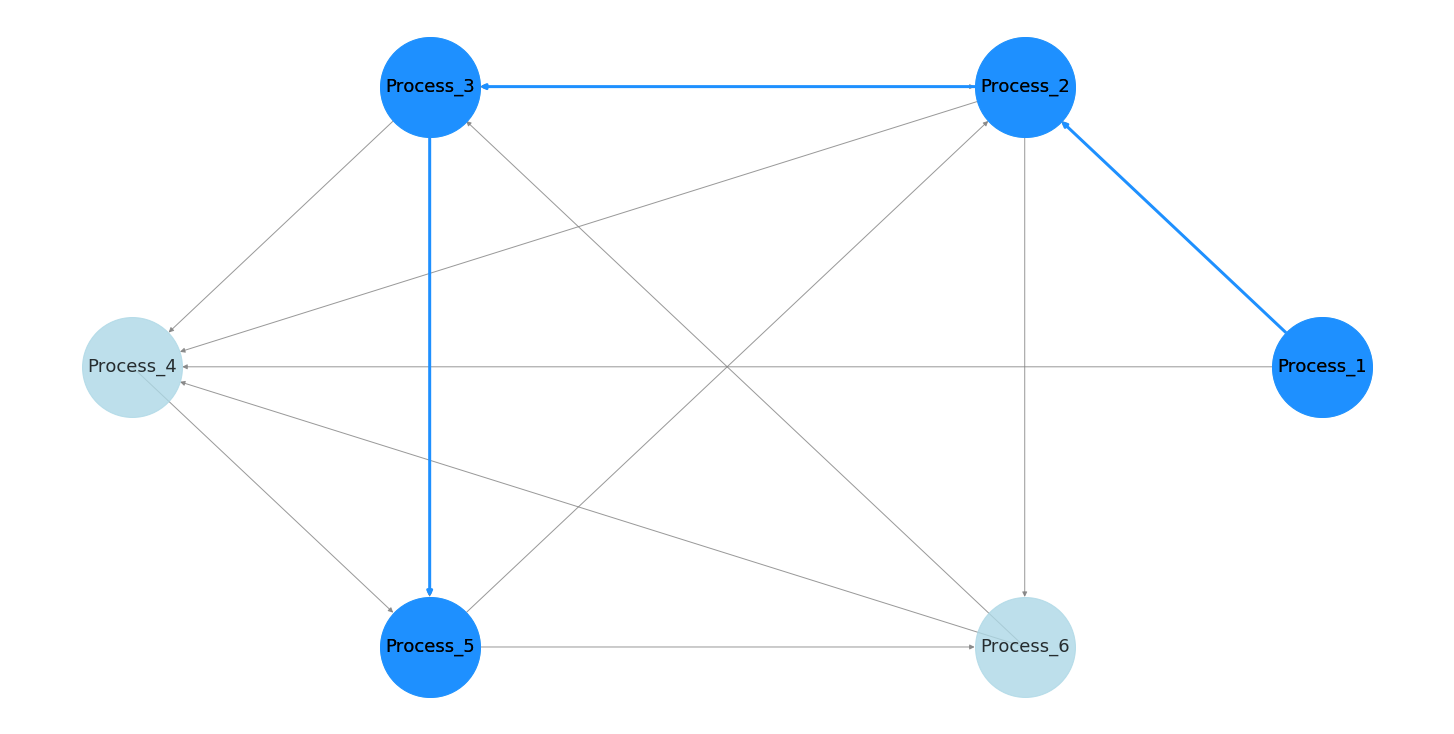

In [7]:
plot_shortest_path(alg_2)

['Process_1', 'Process_4', 'Process_5']


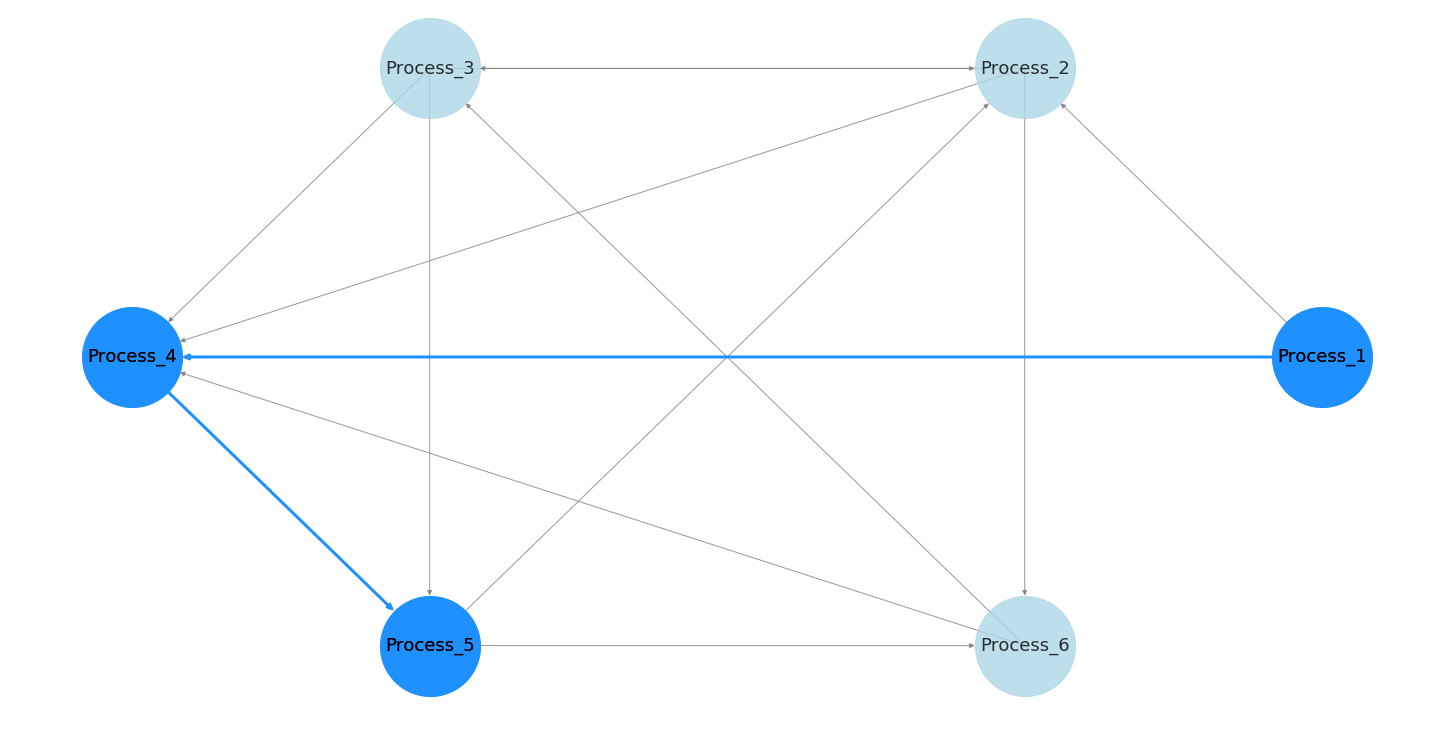

In [8]:
plot_shortest_path(alg_3)

['Process_1', 'Process_2', 'Process_3', 'Process_4', 'Process_5']


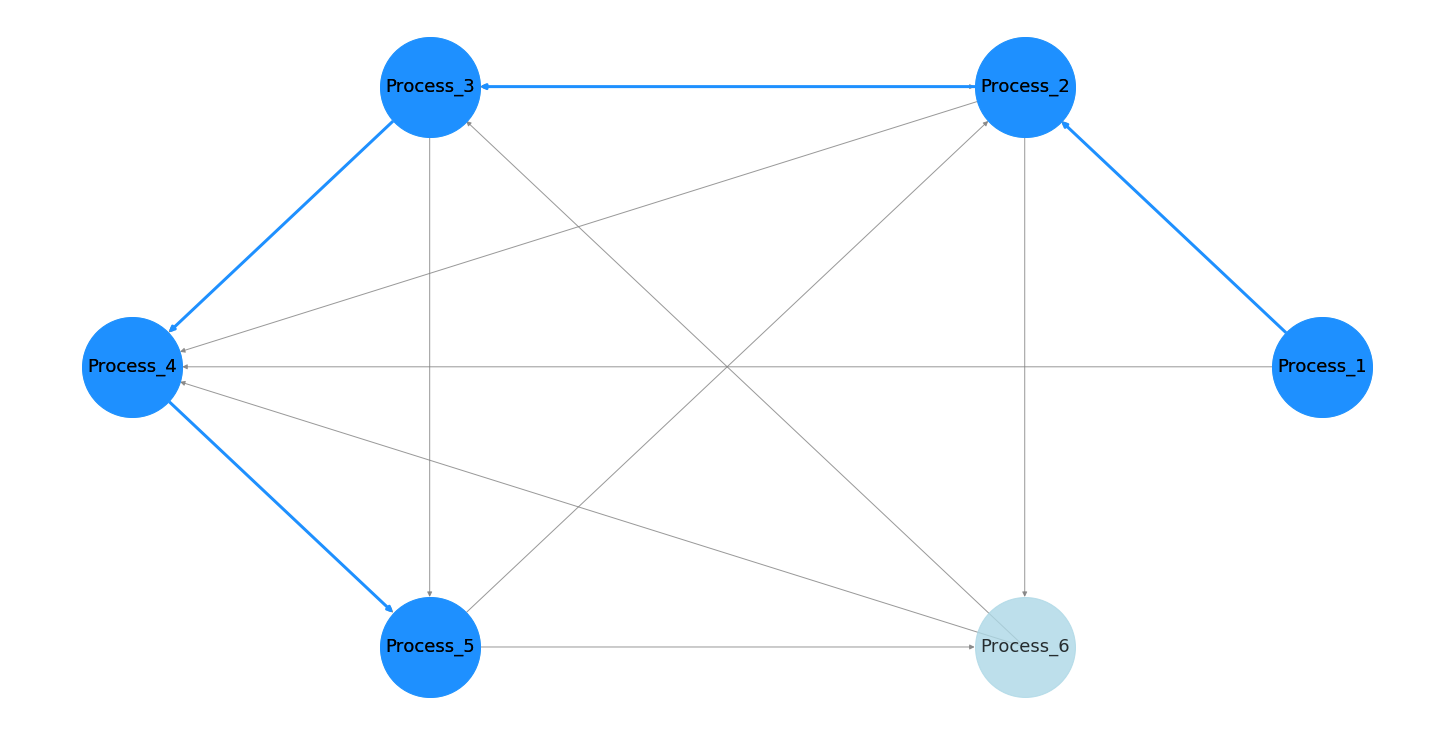

In [9]:
plot_shortest_path(alg_4)

In [10]:
# Una funcion que muestre todos los caminos mas cortos de un grafico dirigido desde un origen hasta un destino

def get_table(DiGraph, origin, destination):
    print("All shortest paths")

In [19]:
get_all_shortest_paths(DG, origin = "Process_1", destination = "Process_5")

Zeit | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 |
-------------------------------------------------------------------------
A1   | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |  0 |  0 |  0 |  0 |  0 |  0 |
-------------------------------------------------------------------------
A2   | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 |  0 |  0 |  0 |  0 |  0 |  0 |
-------------------------------------------------------------------------


['Process_1', 'Process_4', 'Process_5']


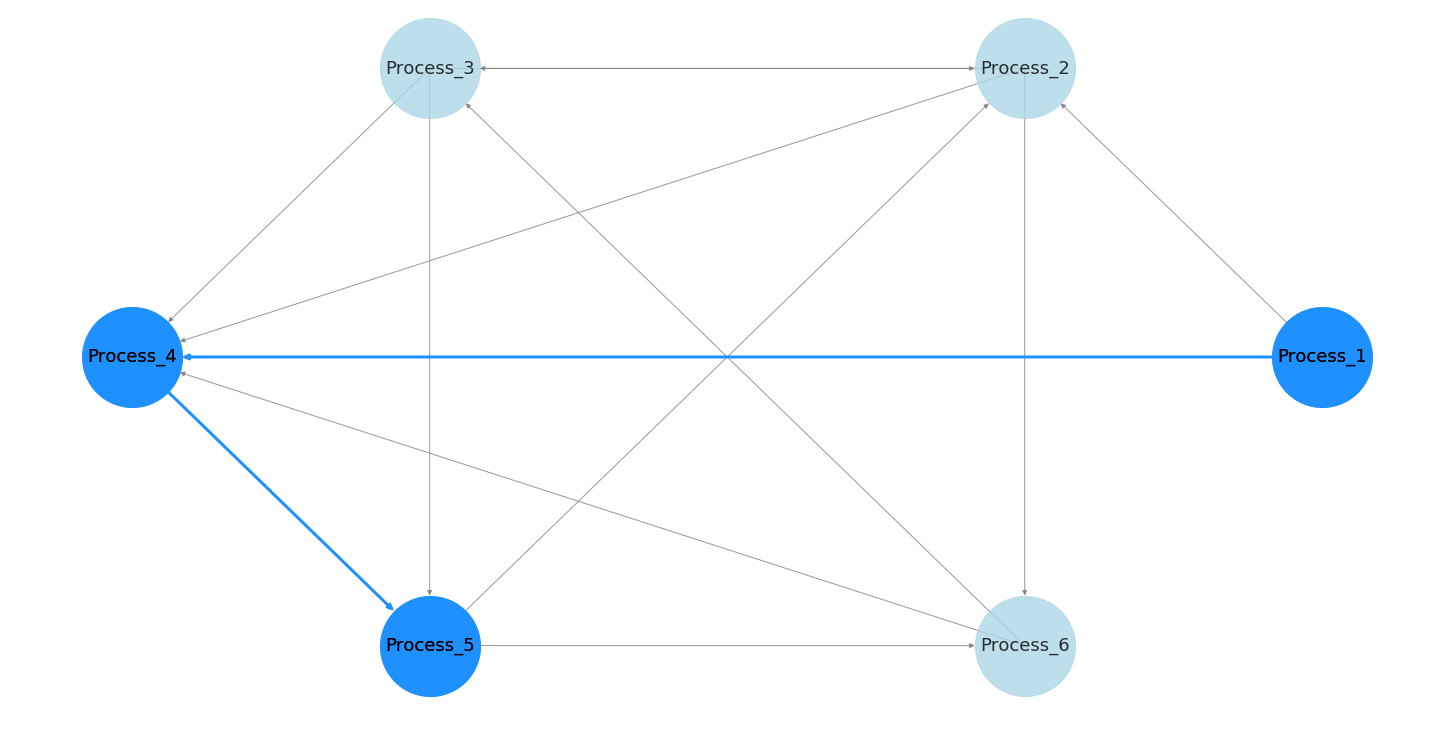

['Process_1', 'Process_2', 'Process_3', 'Process_5']


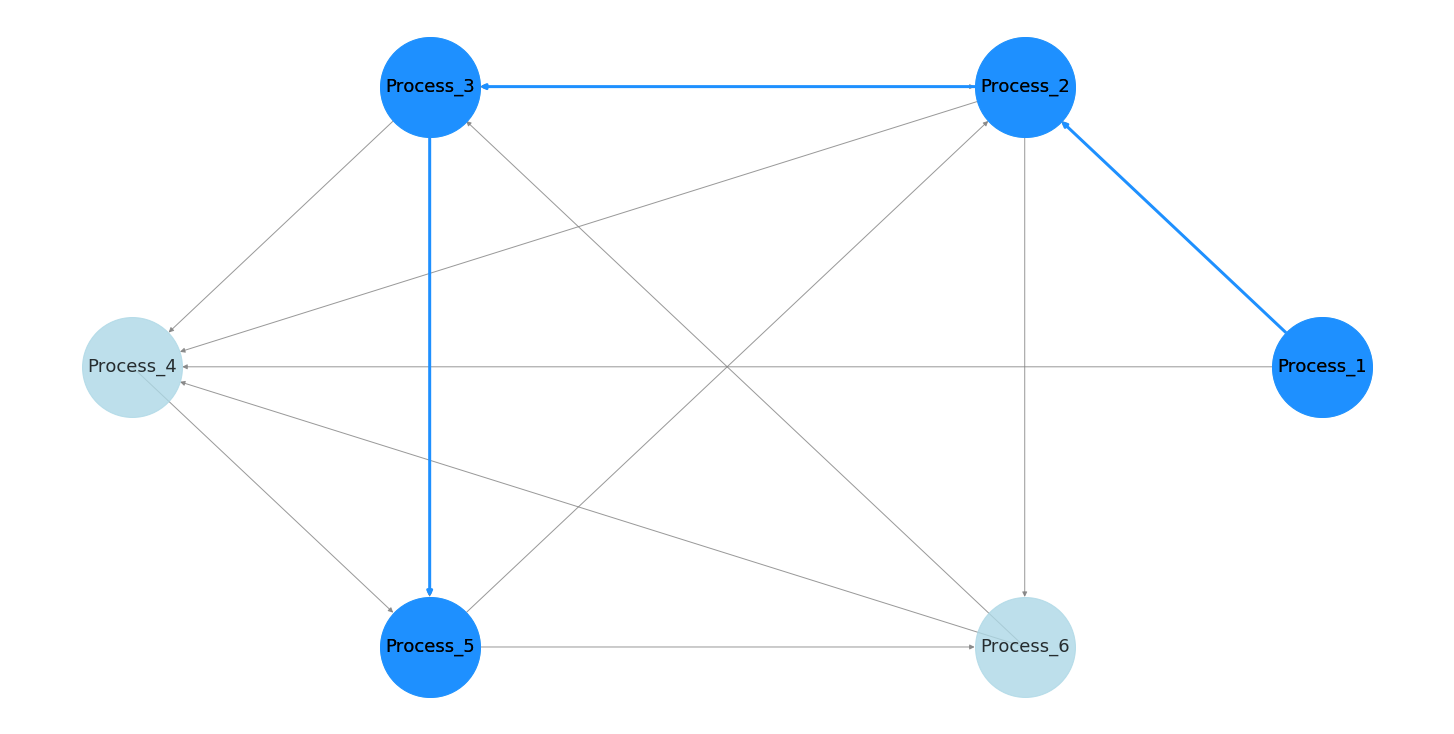

['Process_1', 'Process_4', 'Process_5']


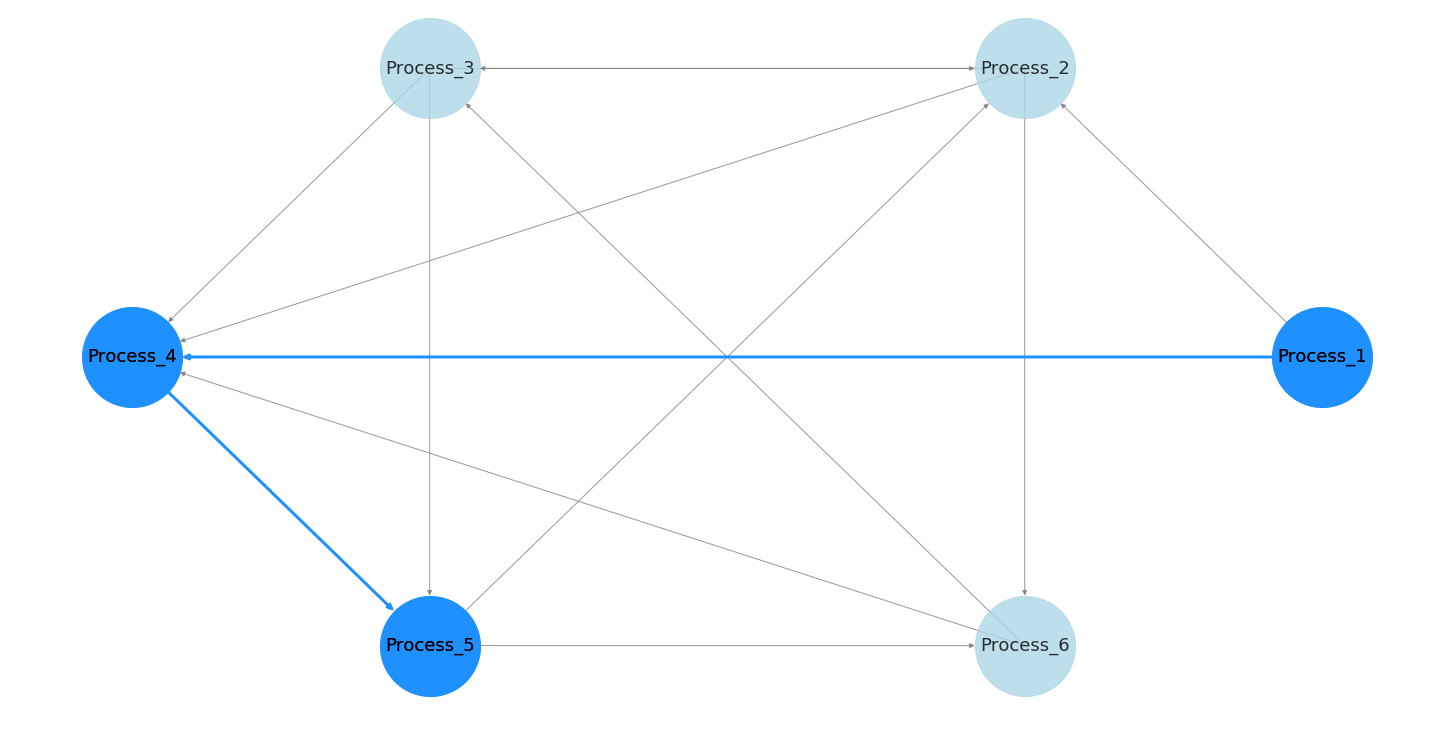

['Process_1', 'Process_2', 'Process_3', 'Process_4', 'Process_5']


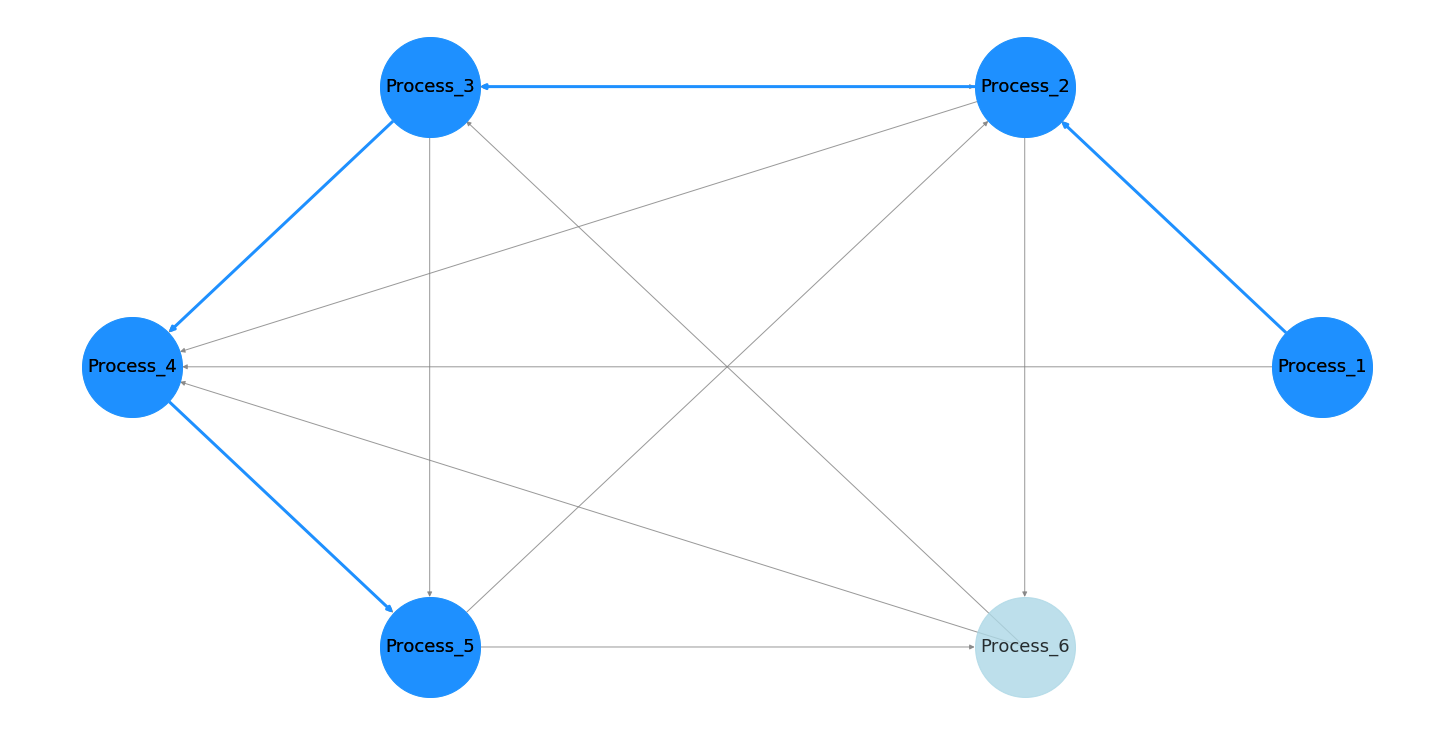

In [22]:
##################################################################################
#
#
#                                Version 3
#
#
##################################################################################

from tkinter import *
root = Tk()
root.wm_iconbitmap('C:/Users/renea/Desktop/Technische Hoschschule Ostwestfalen-Lippe/th_owl_logo_small.ico')
root.wm_title('Technische Hoschschule Ostwestfalen-Lippe')
root.resizable(width=False, height=False)
root.geometry("770x130+500+40")

mainFrame = Frame(root, bd=10, bg='gainsboro',relief=RIDGE)
mainFrame.grid()

innerFrame = Frame(mainFrame, bd=5, bg='gainsboro', relief=RIDGE)
innerFrame.grid()


        #============================================Buttons Widget===============================================#

btnAdd = Button(innerFrame, text="Berechnen", width=10, height =2, font=('arial',18,'bold'), bd=7, bg='gainsboro', command = plot_shortest_path(alg_1))
btnAdd.grid(row=0,column = 0)

btnmulti = Button(innerFrame, text="Algorithmus", width=10, height =2, font=('arial',18,'bold'), bd=7, bg='gainsboro', command = plot_shortest_path(alg_2))
btnmulti.grid(row=0,column = 1)

btndiv = Button(innerFrame, text="Abbruch", width=10, height =2, font=('arial',18,'bold'), bd=7, bg='gainsboro', command = plot_shortest_path(alg_3))
btndiv.grid(row=0,column = 2)

btndiv = Button(innerFrame, text="Weitere Aktivität", width=14, height =2, font=('arial',18,'bold'), bd=7, bg='gainsboro', command = plot_shortest_path(alg_4))
btndiv.grid(row=0,column = 3)


root.mainloop()